<a href="https://colab.research.google.com/github/sirlapat/ML_Assignment1/blob/main/ML_A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [858]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [859]:
# Problem

In [860]:
# t_u, t_c
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = torch.tensor(t_u)
t_c = torch.tensor(t_c)


In [861]:
# problem 1a

In [862]:
def model(t_u, w1, w2, b):
    return w2*t_u**2 + w1*t_u + b #w2 * t_u ** 2 + w1 * t_u + b.

In [863]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()


In [864]:

def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch <= 1 or epoch % 500 ==0:
            print(f"Epoch {epoch}, loss {loss.item():.4f}")

    return params

In [865]:
import torch.optim as optim
optim_attributes_and_methods = dir(optim)
print(optim_attributes_and_methods)



['ASGD', 'Adadelta', 'Adagrad', 'Adam', 'AdamW', 'Adamax', 'LBFGS', 'NAdam', 'Optimizer', 'RAdam', 'RMSprop', 'Rprop', 'SGD', 'SparseAdam', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_functional', '_multi_tensor', 'lr_scheduler', 'swa_utils']


In [866]:
# 1b

In [867]:
t_un = 0.02 * t_u
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr=learning_rate)

num_epochs = 5000
for epoch in range(1, num_epochs + 1):
    predictions = model(t_un, *params)
    loss = loss_fn(predictions, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch <= 1 or epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

print(params)


Epoch 1, Loss: 129.7270
Epoch 500, Loss: 23.9044
Epoch 1000, Loss: 15.6724
Epoch 1500, Loss: 9.2102
Epoch 2000, Loss: 5.1632
Epoch 2500, Loss: 3.1983
Epoch 3000, Loss: 2.4866
Epoch 3500, Loss: 2.3052
Epoch 4000, Loss: 2.2710
Epoch 4500, Loss: 2.2599
Epoch 5000, Loss: 2.2491
tensor([ 5.9713, 10.1040, -7.5652], requires_grad=True)


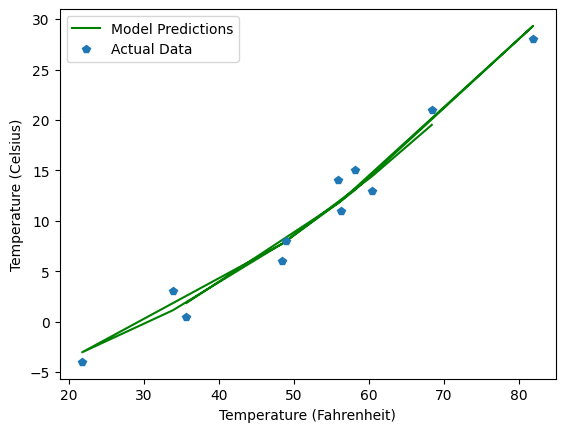

In [868]:
predictions = model(t_un, *params)

# Create a new figure for the plot
plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in green
plt.plot(t_u.numpy(), predictions.detach().numpy(), color='green', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [869]:
t_un = 0.02 * t_u
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.002
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)


Epoch 1, loss 129.7270
Epoch 500, loss 76.3203
Epoch 1000, loss 46.7395
Epoch 1500, loss 32.3924
Epoch 2000, loss 26.1682
Epoch 2500, loss 23.0872
Epoch 3000, loss 20.6621
Epoch 3500, loss 18.2022
Epoch 4000, loss 15.6920
Epoch 4500, loss 13.2379
Epoch 5000, loss 10.9432


tensor([ 4.5900,  6.5184, -1.1306], requires_grad=True)

In [870]:
t_un.numpy()

array([0.714     , 1.118     , 1.164     , 1.638     , 1.1259999 ,
       0.978     , 0.67800003, 0.436     , 0.968     , 1.208     ,
       1.368     ], dtype=float32)

In [871]:
t_p.detach().numpy()

array([20.321878, 19.243414, 18.544188,  4.475416, 19.130278, 20.646362,
       19.976889, 15.784334, 20.7048  , 17.765089, 14.023081],
      dtype=float32)

In [872]:
t_p = model(t_un, *params)



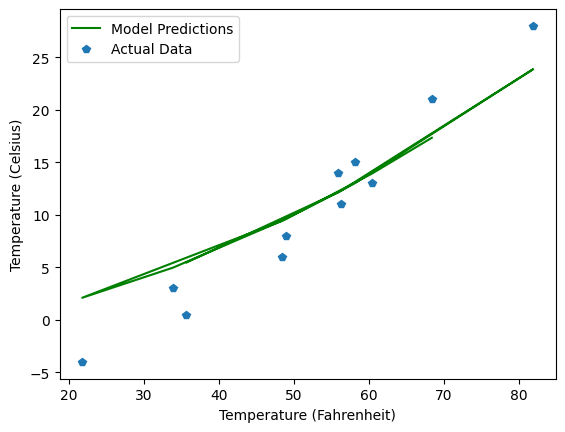

In [873]:
predictions = model(t_un, *params)

# Create a new figure for the plot
plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in green
plt.plot(t_u.numpy(), predictions.detach().numpy(), color='green', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [874]:
# Multiply t_u by 0.1 to get t_un
t_un = 0.02 * t_u
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.003

optimizer = optim.Adam([params], lr=learning_rate)
for epoch in range(1, 5001):
    predictions = model(t_un, *params)
    loss = loss_fn(predictions, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch <= 1 or epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

print(params)


Epoch 1, Loss: 129.7270
Epoch 500, Loss: 59.1598
Epoch 1000, Loss: 32.6967
Epoch 1500, Loss: 24.7968
Epoch 2000, Loss: 21.3325
Epoch 2500, Loss: 18.2082
Epoch 3000, Loss: 15.0603
Epoch 3500, Loss: 12.0579
Epoch 4000, Loss: 9.3680
Epoch 4500, Loss: 7.1066
Epoch 5000, Loss: 5.3300
tensor([ 4.8529,  8.1287, -3.6001], requires_grad=True)


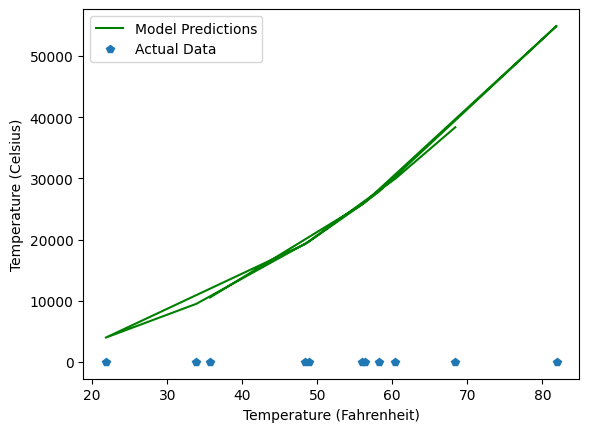

In [875]:
# predictions = model(t_un, *params)
t_p = model(t_u, *params)

# Create a new figure for the plot
plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in green
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='green', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [876]:

t_un = 0.1 * t_u
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)


Epoch 1, loss 675.7944
Epoch 500, loss 578.2527
Epoch 1000, loss 491.2365
Epoch 1500, loss 413.8677
Epoch 2000, loss 345.2539
Epoch 2500, loss 284.6672
Epoch 3000, loss 231.5106
Epoch 3500, loss 185.2833
Epoch 4000, loss 145.5521
Epoch 4500, loss 111.9216
Epoch 5000, loss 84.0093


tensor([ 0.5698,  0.5721, -0.4337], requires_grad=True)

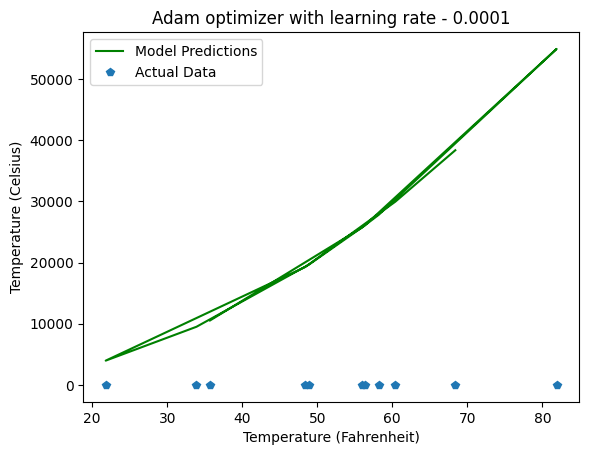

In [877]:
plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in peachpuff color
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='green', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')
plt.title("Adam optimizer with learning rate - 0.0001")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [878]:
# Set t_un equal to t_u
t_un = t_u
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.023
optimizer = optim.SGD([params], lr=learning_rate)

for epoch in range(1, 5001):
    predictions = model(t_un, *params)
    loss = loss_fn(predictions, t_c)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch <= 1 or epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

print(params)

Epoch 1, Loss: 11709471.0000
Epoch 500, Loss: nan
Epoch 1000, Loss: nan
Epoch 1500, Loss: nan
Epoch 2000, Loss: nan
Epoch 2500, Loss: nan
Epoch 3000, Loss: nan
Epoch 3500, Loss: nan
Epoch 4000, Loss: nan
Epoch 4500, Loss: nan
Epoch 5000, Loss: nan
tensor([nan, nan, nan], requires_grad=True)


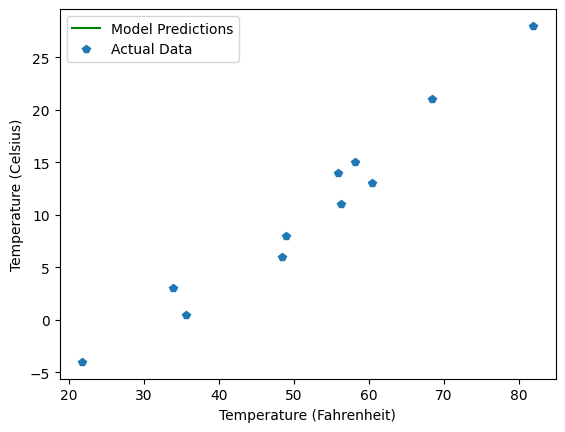

In [879]:
# predictions = model(t_un, *params)
t_p = model(t_un, *params)

# Create a new figure for the plot
plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in green
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='green', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [880]:
# Set t_un equal to t_u
t_un = t_u
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.00000001
optimizer = optim.SGD([params], lr=learning_rate)

for epoch in range(1, 5001):
    predictions = model(t_un, *params)
    loss = loss_fn(predictions, t_c)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch <= 1 or epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

print(params)

Epoch 1, Loss: 11709471.0000
Epoch 500, Loss: 203.5310
Epoch 1000, Loss: 202.9296
Epoch 1500, Loss: 202.3291
Epoch 2000, Loss: 201.7295
Epoch 2500, Loss: 201.1309
Epoch 3000, Loss: 200.5331
Epoch 3500, Loss: 199.9362
Epoch 4000, Loss: 199.3402
Epoch 4500, Loss: 198.7452
Epoch 5000, Loss: 198.1511
tensor([ 9.6692e-01, -1.1139e-02, -9.4794e-04], requires_grad=True)


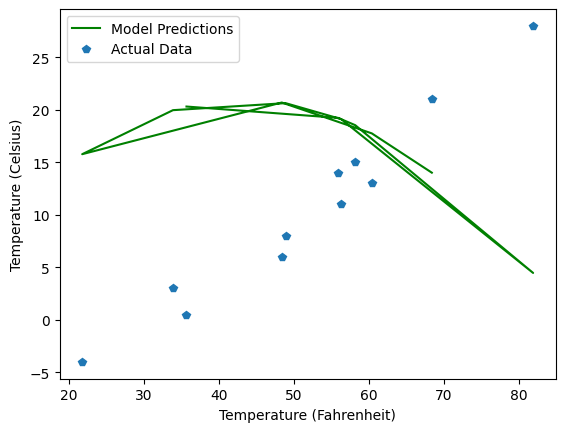

In [881]:
t_p = model(t_un, *params)

plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in peachpuff color
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='green', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')


# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [882]:
#Problem 2

In [883]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [884]:
# Use the URL for the raw CSV data

df = pd.read_csv('/content/drive/MyDrive/Housing.csv')

# Display the first 5 rows of the DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [885]:
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
output_feature = 'price'

In [886]:
scaler = MinMaxScaler()
df[input_features + [output_feature]] = scaler.fit_transform(df[input_features + [output_feature]])



In [887]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
df[input_features] = scaler_x.fit_transform(df[input_features])
df[[output_feature]] = scaler_y.fit_transform(df[[output_feature]])

In [888]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,yes,no,no,no,yes,0.666667,yes,furnished
1,0.909091,0.502405,0.6,1.000000,1.000000,yes,no,no,no,yes,1.000000,no,furnished
2,0.909091,0.571134,0.4,0.333333,0.333333,yes,no,yes,no,no,0.666667,yes,semi-furnished
3,0.906061,0.402062,0.6,0.333333,0.333333,yes,no,yes,no,yes,1.000000,yes,furnished
4,0.836364,0.396564,0.6,0.000000,0.333333,yes,yes,yes,no,yes,0.666667,no,furnished


In [889]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

X = df[input_features].values
y = df[[output_feature]].values

In [890]:
X_t = torch.tensor(X)
Y_t = torch.tensor(y)

In [891]:
X_t

tensor([[0.3966, 0.6000, 0.3333, 0.6667, 0.6667],
        [0.5024, 0.6000, 1.0000, 1.0000, 1.0000],
        [0.5711, 0.4000, 0.3333, 0.3333, 0.6667],
        ...,
        [0.1354, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0866, 0.4000, 0.0000, 0.0000, 0.0000],
        [0.1512, 0.4000, 0.0000, 0.3333, 0.0000]], dtype=torch.float64)

In [892]:
X = df[input_features].values
y = df[[output_feature]].values

In [893]:
def model(X, W, B):
    return torch.sum(X * W, dim=1) + B

In [894]:
weights = torch.ones(5)  # Consolidating W1, W2, W3, W4, W5 into a single tensor, because of 5 inputs
bias = torch.zeros(1)    # Bias as a single value

In [895]:
train_X, val_X, train_Y, val_Y = train_test_split(X, y, test_size=0.2, random_state=42)

In [896]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape

((436, 5), (436, 1), (109, 5), (109, 1))

In [897]:
X_train = torch.tensor(train_X)
y_train =  torch.tensor(train_Y)
X_val =  torch.tensor(val_X)
y_val =  torch.tensor(val_Y)

In [898]:
def training_loop(n_epochs, optimizer, weights, bias, X_train, X_val, y_train, y_val):
    loss_train = []
    loss_val = []
    for epoch in range(1, n_epochs + 1):
        y_train_p = model(X_train, weights, bias)
        train_loss = loss_fn(y_train_p, y_train)

        y_val_p = model(X_train, weights, bias)
        val_loss = loss_fn(y_val_p, y_val)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            loss_train.append(train_loss)
            loss_val.append(val_loss)
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")

    return weights, bias, loss_train, loss_val

In [899]:
def model_training(X, y, epochs, optimizer, learning_rate):
  train_X, val_X, train_Y, val_Y = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train = torch.tensor(train_X)
  y_train =  torch.tensor(train_Y)
  X_val =  torch.tensor(val_X)
  y_val =  torch.tensor(val_Y)

  n_w = X.shape[1]
  weights = torch.tensor([1.0] * n_w, requires_grad=True)
  bias = torch.tensor([0.0], requires_grad=True)
  if optimizer == 'SGD':
    optimizer = optim.SGD([weights, bias], lr=learning_rate)
  elif optimizer == 'ADAM':
    optimizer = optim.Adam([weights, bias], lr=learning_rate)

  w, b, train_loss, val_loss = training_loop(
                                n_epochs = epochs,
                                optimizer = optimizer,
                                weights = weights,
                                bias = bias,
                                X_train = X_train,
                                X_val = X_val,
                                y_train = y_train,
                                y_val = y_val)
  return w, b, train_loss, val_loss

In [900]:
weights_adam_1, bias_adam_1, train_loss_adam_1, val_loss_adam_1 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.01)


Epoch 500, Training loss 0.0266, Validation loss 0.0424
Epoch 1000, Training loss 0.0234, Validation loss 0.0389
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [901]:
weights_adam_1, bias_adam_1

(tensor([ 1.1828e-07,  2.5502e-07, -6.8351e-08, -2.1430e-09,  6.7796e-09],
        requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [902]:
weights_adam_01, bias_adam_01, train_loss_adam_01, val_loss_adam_01 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.0002)


Epoch 500, Training loss 0.9088, Validation loss 0.8854
Epoch 1000, Training loss 0.6044, Validation loss 0.5908
Epoch 1500, Training loss 0.3991, Validation loss 0.3940
Epoch 2000, Training loss 0.2689, Validation loss 0.2711
Epoch 2500, Training loss 0.1925, Validation loss 0.2007
Epoch 3000, Training loss 0.1510, Validation loss 0.1637
Epoch 3500, Training loss 0.1283, Validation loss 0.1440
Epoch 4000, Training loss 0.1132, Validation loss 0.1305
Epoch 4500, Training loss 0.0999, Validation loss 0.1178
Epoch 5000, Training loss 0.0868, Validation loss 0.1048


In [903]:
weights_adam_01, bias_adam_01

(tensor([0.4758, 0.5180, 0.3094, 0.3627, 0.3532], requires_grad=True),
 tensor([-0.3121], requires_grad=True))

In [904]:
weights_adam_001, bias_adam_001, train_loss_adam_001, val_loss_adam_001 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.003)


Epoch 500, Training loss 0.0762, Validation loss 0.0943
Epoch 1000, Training loss 0.0341, Validation loss 0.0507
Epoch 1500, Training loss 0.0268, Validation loss 0.0426
Epoch 2000, Training loss 0.0246, Validation loss 0.0402
Epoch 2500, Training loss 0.0236, Validation loss 0.0391
Epoch 3000, Training loss 0.0232, Validation loss 0.0387
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [905]:
weights_adam_001, bias_adam_001

(tensor([ 2.5402e-05,  3.0891e-04, -1.0130e-04, -4.5751e-05, -6.7066e-06],
        requires_grad=True),
 tensor([0.2559], requires_grad=True))

In [906]:
weights_adam_0001, bias_adam_0001, train_loss_adam_0001, val_loss_adam_0001 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.0001)


Epoch 500, Training loss 1.1064, Validation loss 1.0777
Epoch 1000, Training loss 0.9080, Validation loss 0.8847
Epoch 1500, Training loss 0.7402, Validation loss 0.7219
Epoch 2000, Training loss 0.5992, Validation loss 0.5858
Epoch 2500, Training loss 0.4823, Validation loss 0.4735
Epoch 3000, Training loss 0.3869, Validation loss 0.3825
Epoch 3500, Training loss 0.3107, Validation loss 0.3104
Epoch 4000, Training loss 0.2516, Validation loss 0.2551
Epoch 4500, Training loss 0.2072, Validation loss 0.2143
Epoch 5000, Training loss 0.1752, Validation loss 0.1854


In [907]:
weights_adam_0001, bias_adam_0001

(tensor([0.6064, 0.6119, 0.5784, 0.5884, 0.5866], requires_grad=True),
 tensor([-0.3670], requires_grad=True))

In [908]:
weights_sgd_1, bias_sgd_1, train_loss_sgd_1, val_loss_sgd_1 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.01)


Epoch 500, Training loss 0.0900, Validation loss 0.1071
Epoch 1000, Training loss 0.0447, Validation loss 0.0610
Epoch 1500, Training loss 0.0326, Validation loss 0.0485
Epoch 2000, Training loss 0.0284, Validation loss 0.0441
Epoch 2500, Training loss 0.0263, Validation loss 0.0420
Epoch 3000, Training loss 0.0252, Validation loss 0.0407
Epoch 3500, Training loss 0.0245, Validation loss 0.0400
Epoch 4000, Training loss 0.0240, Validation loss 0.0395
Epoch 4500, Training loss 0.0237, Validation loss 0.0392
Epoch 5000, Training loss 0.0235, Validation loss 0.0390


In [909]:
weights_sgd_1, bias_sgd_1

(tensor([ 0.0912,  0.0961,  0.0113, -0.0293, -0.0281], requires_grad=True),
 tensor([0.2086], requires_grad=True))

In [910]:
weights_sgd_01, bias_sgd_01, train_loss_sgd_01, val_loss_sgd_01 =  model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.002)


Epoch 500, Training loss 0.2274, Validation loss 0.2421
Epoch 1000, Training loss 0.1733, Validation loss 0.1909
Epoch 1500, Training loss 0.1368, Validation loss 0.1543
Epoch 2000, Training loss 0.1099, Validation loss 0.1271
Epoch 2500, Training loss 0.0900, Validation loss 0.1070
Epoch 3000, Training loss 0.0752, Validation loss 0.0920
Epoch 3500, Training loss 0.0641, Validation loss 0.0807
Epoch 4000, Training loss 0.0558, Validation loss 0.0723
Epoch 4500, Training loss 0.0495, Validation loss 0.0659
Epoch 5000, Training loss 0.0447, Validation loss 0.0609


In [911]:
weights_sgd_01, bias_sgd_01

(tensor([0.4766, 0.4146, 0.3760, 0.0358, 0.0539], requires_grad=True),
 tensor([-0.0915], requires_grad=True))

In [912]:
weights_sgd_001, bias_sgd_001, train_loss_sgd_001, val_loss_sgd_001 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.003)


Epoch 500, Training loss 0.1965, Validation loss 0.2136
Epoch 1000, Training loss 0.1368, Validation loss 0.1543
Epoch 1500, Training loss 0.0992, Validation loss 0.1163
Epoch 2000, Training loss 0.0752, Validation loss 0.0920
Epoch 2500, Training loss 0.0596, Validation loss 0.0762
Epoch 3000, Training loss 0.0495, Validation loss 0.0659
Epoch 3500, Training loss 0.0427, Validation loss 0.0589
Epoch 4000, Training loss 0.0381, Validation loss 0.0542
Epoch 4500, Training loss 0.0349, Validation loss 0.0509
Epoch 5000, Training loss 0.0326, Validation loss 0.0485


In [913]:
weights_sgd_001, bias_sgd_001

(tensor([ 0.3787,  0.3344,  0.2542, -0.0463, -0.0334], requires_grad=True),
 tensor([0.0226], requires_grad=True))

In [914]:
weights_sgd_0001, bias_sgd_0001, train_loss_sgd_0001, val_loss_sgd_0001 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.0001)


Epoch 500, Training loss 1.0859, Validation loss 1.0583
Epoch 1000, Training loss 0.8918, Validation loss 0.8700
Epoch 1500, Training loss 0.7430, Validation loss 0.7263
Epoch 2000, Training loss 0.6288, Validation loss 0.6166
Epoch 2500, Training loss 0.5409, Validation loss 0.5326
Epoch 3000, Training loss 0.4732, Validation loss 0.4683
Epoch 3500, Training loss 0.4207, Validation loss 0.4188
Epoch 4000, Training loss 0.3800, Validation loss 0.3806
Epoch 4500, Training loss 0.3482, Validation loss 0.3510
Epoch 5000, Training loss 0.3231, Validation loss 0.3280


In [915]:
weights_sgd_0001, bias_sgd_0001

(tensor([0.8369, 0.7544, 0.8998, 0.7654, 0.7854], requires_grad=True),
 tensor([-0.4963], requires_grad=True))

In [916]:
epochs = range(1, 500 * len(train_loss_sgd_1), 500)
epochs

range(1, 5000, 500)

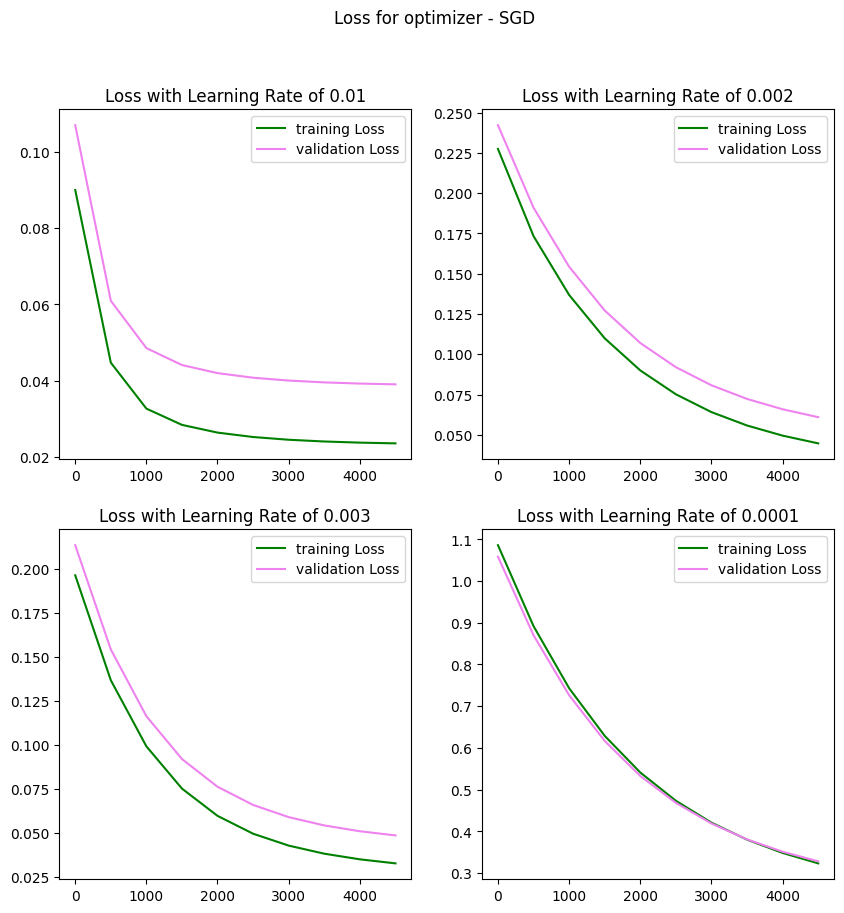

In [917]:
plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer - SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_1]), color='green', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_1]), color='violet', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_01]), color='green', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_01]), color='violet', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.002')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_001]), color='green', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_001]), color='violet', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.003')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_0001]), color='green', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_0001]), color='violet', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.0001')
plt.legend()

plt.show()

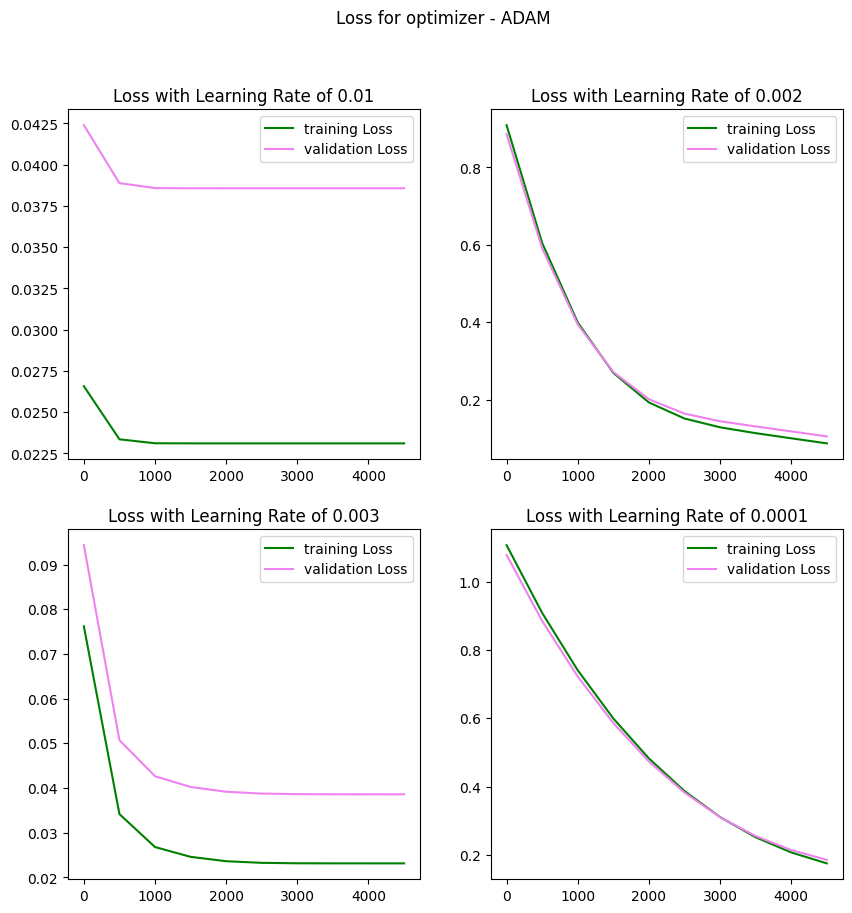

In [918]:
plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer - ADAM')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_1]), color='green', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_1]), color='violet', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_01]), color='green', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_01]), color='violet', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.002')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_001]), color='green', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_001]), color='violet', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.003')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_0001]), color='green', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_0001]), color='violet', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.0001')
plt.legend()

plt.show()


In [919]:
# problem 3

In [920]:
# Use the URL for the raw CSV data

df = pd.read_csv('/content/drive/MyDrive/Housing.csv')

# Display the first 5 rows of the DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [921]:
df['furnishingstatus'].value_counts().unique

<bound method Series.unique of semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64>

In [922]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=False)
df = df.drop('furnishingstatus_semi-furnished', axis=1)

In [923]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,1,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,0,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,1,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,1,0


In [924]:
binary_columns = df.select_dtypes(include=['object']).columns
binary_columns


Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [925]:
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [926]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   price                         545 non-null    int64
 1   area                          545 non-null    int64
 2   bedrooms                      545 non-null    int64
 3   bathrooms                     545 non-null    int64
 4   stories                       545 non-null    int64
 5   mainroad                      545 non-null    int64
 6   guestroom                     545 non-null    int64
 7   basement                      545 non-null    int64
 8   hotwaterheating               545 non-null    int64
 9   airconditioning               545 non-null    int64
 10  parking                       545 non-null    int64
 11  prefarea                      545 non-null    int64
 12  furnishingstatus_furnished    545 non-null    uint8
 13  furnishingstatus_unfurnished  545 n

In [927]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [928]:
X = df.drop('price', axis = 1)
y = df[['price']]

In [929]:
X = pd.DataFrame(scaler_x.fit_transform(X), columns=X.columns, index=X.index).values
y = pd.DataFrame(scaler_y.fit_transform(y), columns=y.columns, index=y.index).values

In [930]:
weights_adam_1, bias_adam_1, train_loss_adam_1, val_loss_adam_1 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.01)


Epoch 500, Training loss 0.0605, Validation loss 0.0784
Epoch 1000, Training loss 0.0353, Validation loss 0.0518
Epoch 1500, Training loss 0.0273, Validation loss 0.0433
Epoch 2000, Training loss 0.0244, Validation loss 0.0401
Epoch 2500, Training loss 0.0234, Validation loss 0.0390
Epoch 3000, Training loss 0.0232, Validation loss 0.0387
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [931]:
weights_adam_1, bias_adam_1

(tensor([-2.0866e-07,  4.0596e-05, -1.0004e-05, -6.8162e-06,  6.8431e-06,
          1.9621e-07, -6.6898e-07,  8.3814e-07, -1.6544e-08, -1.2367e-06,
         -1.3017e-06,  1.0794e-06,  2.2106e-06], requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [932]:
weights_adam_01, bias_adam_01, train_loss_adam_01, val_loss_adam_01 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.002)


Epoch 500, Training loss 0.4713, Validation loss 0.4656
Epoch 1000, Training loss 0.1191, Validation loss 0.1386
Epoch 1500, Training loss 0.0860, Validation loss 0.1051
Epoch 2000, Training loss 0.0657, Validation loss 0.0839
Epoch 2500, Training loss 0.0526, Validation loss 0.0701
Epoch 3000, Training loss 0.0436, Validation loss 0.0606
Epoch 3500, Training loss 0.0372, Validation loss 0.0538
Epoch 4000, Training loss 0.0324, Validation loss 0.0487
Epoch 4500, Training loss 0.0290, Validation loss 0.0450
Epoch 5000, Training loss 0.0266, Validation loss 0.0425


In [933]:
weights_adam_01, bias_adam_01

(tensor([ 0.0836,  0.3351, -0.0917, -0.0311,  0.1028, -0.0087,  0.0115,  0.0118,
         -0.0073, -0.0207, -0.0215,  0.0130,  0.0351], requires_grad=True),
 tensor([0.0188], requires_grad=True))

In [945]:
weights_adam_001, bias_adam_001, train_loss_adam_001, val_loss_adam_001 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.003)


Epoch 500, Training loss 0.1558, Validation loss 0.1711
Epoch 1000, Training loss 0.0886, Validation loss 0.1077
Epoch 1500, Training loss 0.0621, Validation loss 0.0801
Epoch 2000, Training loss 0.0476, Validation loss 0.0648
Epoch 2500, Training loss 0.0387, Validation loss 0.0554
Epoch 3000, Training loss 0.0328, Validation loss 0.0491
Epoch 3500, Training loss 0.0288, Validation loss 0.0449
Epoch 4000, Training loss 0.0263, Validation loss 0.0422
Epoch 4500, Training loss 0.0247, Validation loss 0.0405
Epoch 5000, Training loss 0.0238, Validation loss 0.0395


In [946]:
weights_adam_001, bias_adam_001, train_loss_adam_001, val_loss_adam_001 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.0001)


Epoch 500, Training loss 13.0457, Validation loss 12.8904
Epoch 1000, Training loss 11.3789, Validation loss 11.2355
Epoch 1500, Training loss 9.8671, Validation loss 9.7352
Epoch 2000, Training loss 8.4970, Validation loss 8.3764
Epoch 2500, Training loss 7.2580, Validation loss 7.1485
Epoch 3000, Training loss 6.1414, Validation loss 6.0428
Epoch 3500, Training loss 5.1404, Validation loss 5.0523
Epoch 4000, Training loss 4.2489, Validation loss 4.1712
Epoch 4500, Training loss 3.4619, Validation loss 3.3943
Epoch 5000, Training loss 2.7748, Validation loss 2.7171


In [947]:
weights_adam_0001, bias_adam_0001

(tensor([0.5580, 0.5592, 0.5553, 0.5571, 0.5588, 0.5530, 0.5554, 0.5571, 0.5542,
         0.5563, 0.5540, 0.5553, 0.5615], requires_grad=True),
 tensor([-0.4394], requires_grad=True))

In [948]:
weights_sgd_1, bias_sgd_1, train_loss_sgd_1, val_loss_sgd_1 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.01)


Epoch 500, Training loss 0.1272, Validation loss 0.1449
Epoch 1000, Training loss 0.0591, Validation loss 0.0757
Epoch 1500, Training loss 0.0386, Validation loss 0.0547
Epoch 2000, Training loss 0.0308, Validation loss 0.0467
Epoch 2500, Training loss 0.0274, Validation loss 0.0431
Epoch 3000, Training loss 0.0257, Validation loss 0.0413
Epoch 3500, Training loss 0.0247, Validation loss 0.0403
Epoch 4000, Training loss 0.0242, Validation loss 0.0397
Epoch 4500, Training loss 0.0238, Validation loss 0.0394
Epoch 5000, Training loss 0.0236, Validation loss 0.0391


In [949]:
weights_sgd_1, bias_sgd_1

(tensor([ 0.0908,  0.1152,  0.0146, -0.0318,  0.0100, -0.0054, -0.0024,  0.0098,
         -0.0027, -0.0278, -0.0067,  0.0036,  0.0068], requires_grad=True),
 tensor([0.1933], requires_grad=True))

In [950]:
weights_sgd_1, bias_sgd_1, train_loss_sgd_1, val_loss_sgd_1 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.002)


Epoch 500, Training loss 0.0591, Validation loss 0.0757
Epoch 1000, Training loss 0.0308, Validation loss 0.0467
Epoch 1500, Training loss 0.0257, Validation loss 0.0413
Epoch 2000, Training loss 0.0242, Validation loss 0.0397
Epoch 2500, Training loss 0.0236, Validation loss 0.0391
Epoch 3000, Training loss 0.0233, Validation loss 0.0388
Epoch 3500, Training loss 0.0232, Validation loss 0.0387
Epoch 4000, Training loss 0.0232, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [951]:
weights_sgd_01, bias_sgd_01

(tensor([ 0.4190,  0.3811,  0.3898,  0.0902,  0.1185, -0.0021,  0.0461,  0.3843,
         -0.0755,  0.0711, -0.0039,  0.0898,  0.2047], requires_grad=True),
 tensor([-0.2905], requires_grad=True))

In [952]:
weights_sgd_001, bias_sgd_001, train_loss_sgd_001, val_loss_sgd_001 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.003)


Epoch 500, Training loss 0.3472, Validation loss 0.3674
Epoch 1000, Training loss 0.2058, Validation loss 0.2244
Epoch 1500, Training loss 0.1413, Validation loss 0.1592
Epoch 2000, Training loss 0.1050, Validation loss 0.1223
Epoch 2500, Training loss 0.0820, Validation loss 0.0990
Epoch 3000, Training loss 0.0666, Validation loss 0.0833
Epoch 3500, Training loss 0.0559, Validation loss 0.0724
Epoch 4000, Training loss 0.0483, Validation loss 0.0646
Epoch 4500, Training loss 0.0427, Validation loss 0.0589
Epoch 5000, Training loss 0.0386, Validation loss 0.0547


In [953]:
weights_sgd_001, bias_sgd_001

(tensor([ 0.3427,  0.3288,  0.2730,  0.0075,  0.0956, -0.0216,  0.0293,  0.2367,
         -0.0466, -0.0123, -0.0186,  0.0447,  0.1112], requires_grad=True),
 tensor([-0.1201], requires_grad=True))

In [954]:
weights_sgd_0001, bias_sgd_0001, train_loss_sgd_0001, val_loss_sgd_0001 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.0001)


Epoch 500, Training loss 9.0245, Validation loss 8.9016
Epoch 1000, Training loss 5.5765, Validation loss 5.4878
Epoch 1500, Training loss 3.5477, Validation loss 3.4850
Epoch 2000, Training loss 2.3504, Validation loss 2.3077
Epoch 2500, Training loss 1.6407, Validation loss 1.6132
Epoch 3000, Training loss 1.2170, Validation loss 1.2012
Epoch 3500, Training loss 0.9612, Validation loss 0.9542
Epoch 4000, Training loss 0.8040, Validation loss 0.8038
Epoch 4500, Training loss 0.7050, Validation loss 0.7099
Epoch 5000, Training loss 0.6403, Validation loss 0.6491


In [955]:
weights_sgd_0001, bias_sgd_0001

(tensor([ 0.6591,  0.4947,  0.8329,  0.5950, -0.0886,  0.5903,  0.3723,  0.9077,
          0.3949,  0.6206,  0.5298,  0.5412,  0.6495], requires_grad=True),
 tensor([-1.1368], requires_grad=True))

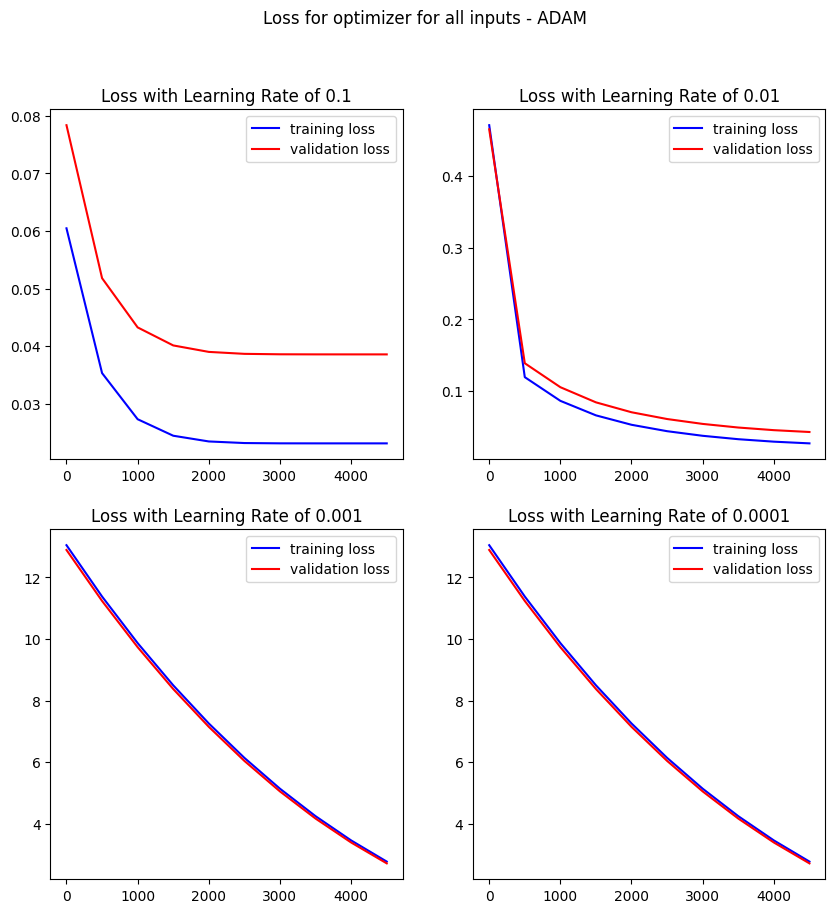

In [956]:
plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer for all inputs - ADAM')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_1]), color='blue', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_1]), color='red', label= 'validation loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_01]), color='blue', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_01]), color='red', label= 'validation loss')
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_001]), color='blue', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_001]), color='red', label= 'validation loss')
plt.title('Loss with Learning Rate of 0.001')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_0001]), color='blue', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_0001]), color='red', label= 'validation loss')
plt.title('Loss with Learning Rate of 0.0001')
plt.legend()

plt.show()

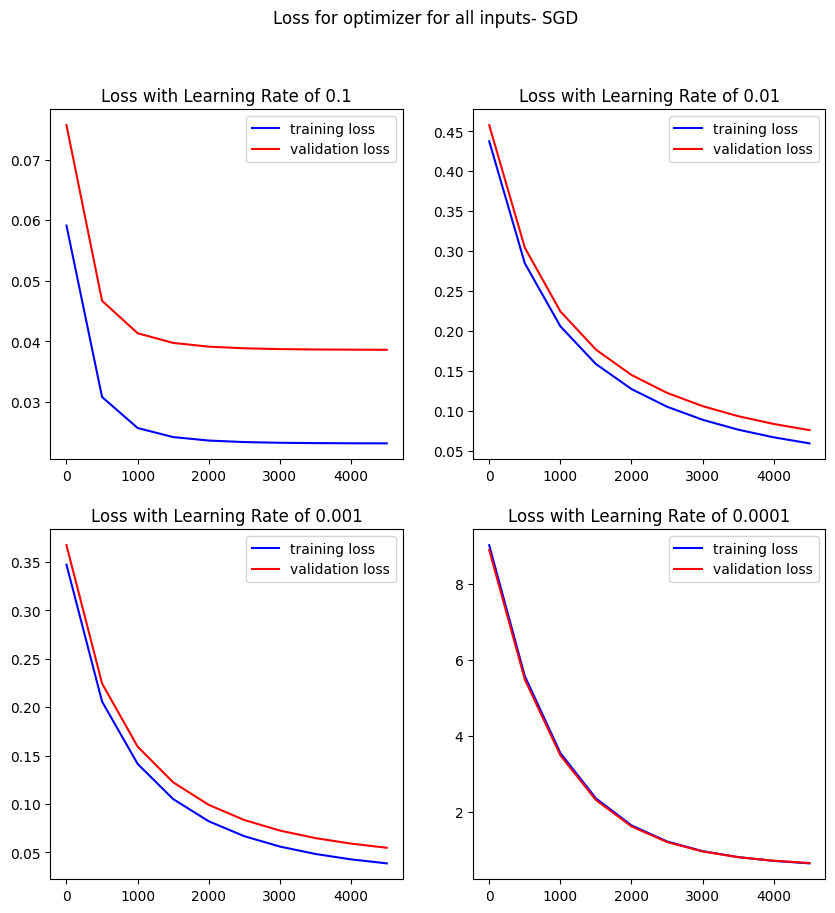

In [957]:
plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer for all inputs- SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_1]), color='blue', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_1]), color='red', label = 'validation loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_01]), color='blue', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_01]), color='red', label = 'validation loss')
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_001]), color='blue', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_001]), color='red', label = 'validation loss')
plt.title('Loss with Learning Rate of 0.001')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_0001]), color='blue', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_0001]), color='red', label = 'validation loss')
plt.title('Loss with Learning Rate of 0.0001')
plt.legend()

plt.show()
